

---

###                    **Recipe Recommendation System**

---

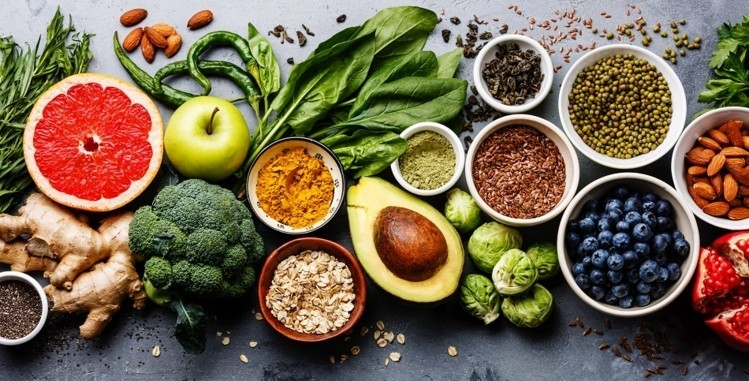



####**<u>Objective :</u>**

In our project, we're leveraging Natural Language Processing (NLP) techniques for content-based filtering in recommender systems. This means we're using the textual data of recipes to suggest top recipes to users based on their input, whether it's the recipe name or the list of ingredients.

Unlike some recommender systems that rely on additional metadata such as cuisine type, difficulty level, cook-time, seasonal data, or user-generated content like comments and reviews, our approach focuses solely on the textual content of the recipes themselves.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import re
import string

import nltk
from wordcloud import WordCloud
from scipy.sparse import csr_matrix

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

####**<u>Load Data</u>**

In [4]:
file1 = "recipes_raw_nosource_ar.json"
all_recipes1 = pd.read_json(file1)
file2 = "recipes_raw_nosource_epi.json"
all_recipes2  = pd.read_json(file2)
file3 = "recipes_raw_nosource_fn.json"
all_recipes3 = pd.read_json(file3)

In [5]:
all_recipes1.head()

,rmK12Uau.ntP510KeImX506H6Mr6jTu,5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,clyYQv.CplpwJtjNaFGhx0VilNYqRxu,BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,kq.naD.8G19M4UU9dVvJgHtpfo.l/eC,lYrgWNn00EXblOupzM3tL0jGr9O0CB2,Fu0DgGYFUGwc0BBlN6r20o/ihOVs5bO,MBRNtqELRRuv8zJH4k7Aba2bmIc2A3C,ZPyPoMiNvgAfrKcRpH9FEYV/XsPZBsW,...,uHHb42/tuIKsmN5U6l9AD.FdVpSFxs6,IPAeN3L6rm2oughJpUhbG038k.ACJ0K,3UIhlTQFH5jyIaHN8zeKlK5V.94Kjwu,PdBxkE2gnI/.ynokkp1Hu1KLGZnGdei,SB46Udqc5Svsi70S1qRmRLv5tlg8Oca,gehEOcDPtU3SmNSXrwWwWD4ulPpUdMO,VRAsyF.1xMBYqAVKX1biyIORH6N6qzy,Lf8/u.0k2029QMSQFrHS4gRsvKOQFUG,ay.AqX/9ysBtWHcnHoDeGAyJ5Orla8e,2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
title,Slow Cooker Chicken and Dumplings,Awesome Slow Cooker Pot Roast,Brown Sugar Meatloaf,Best Chocolate Chip Cookies,Homemade Mac and Cheese Casserole,Banana Banana Bread,Chef John's Fisherman's Pie,Mom's Zucchini Bread,The Best Rolled Sugar Cookies,Singapore Chili Crabs,...,Citrus Creme Brulee,Honey Nutty Granola,Salmon en Croute,Homemade Blender Butter,Gluten Free Chicken Noodle Soup,Thai-Indian Veggie Soup,Coconut Milk-Free Panang Curry Chicken,Cooked Cold Salad,Easy Eggnog Creme Brulee,Super Power Stovetop Granola
ingredients,"[4 skinless, boneless chicken breast halves AD...",[2 (10.75 ounce) cans condensed cream of mushr...,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...","[1 cup butter, softened ADVERTISEMENT, 1 cup w...",[8 ounces whole wheat rotini pasta ADVERTISEME...,"[2 cups all-purpose flour ADVERTISEMENT, 1 tea...","[For potato crust: ADVERTISEMENT, 3 russet pot...","[3 cups all-purpose flour ADVERTISEMENT, 1 tea...","[1 1/2 cups butter, softened ADVERTISEMENT, 2 ...","[Sauce: ADVERTISEMENT, 1/2 cup ketchup ADVERTI...",...,"[2 oranges, juiced ADVERTISEMENT, lemon, juice...","[3 cups rolled oats ADVERTISEMENT, 1 1/2 cups ...","[1 cup watercress, or as desired ADVERTISEMENT...","[2 pints heavy whipping cream ADVERTISEMENT, s...",[1/2 (12 ounce) box Barilla® Gluten Free Elbow...,"[2 teaspoons olive oil ADVERTISEMENT, 1/4 cup ...","[2 cups light cream ADVERTISEMENT, 1/4 teaspoo...","[3 tablespoons bacon grease ADVERTISEMENT, 2 c...","[4 egg yolks ADVERTISEMENT, 1 tablespoon white...","[1/4 cup canola oil ADVERTISEMENT, 3 cups quic..."
instructions,"Place the chicken, butter, soup, and onion in ...","In a slow cooker, mix cream of mushroom soup, ...",Preheat oven to 350 degrees F (175 degrees C)....,Preheat oven to 350 degrees F (175 degrees C)....,Preheat oven to 350 degrees F. Line a 2-quart ...,Preheat oven to 350 degrees F (175 degrees C)....,Bring a large saucepan of salted water and to ...,Grease and flour two 8 x 4 inch pans. Preheat ...,"In a large bowl, cream together butter and sug...","Whisk ketchup, chicken broth, egg, soy sauce, ...",...,Preheat oven to 300 degrees F (150 degrees C)....,Preheat oven to 300 degrees F (150 degrees C)....,Preheat oven to 375 degrees F (190 degrees C)....,Pour cream into a blender. Cover and blend unt...,Saute onions in olive oil over medium heat unt...,Heat oil in a large pot over medium heat. Add ...,Heat cream and coconut extract in a skillet or...,Heat bacon grease in a skillet over medium-hig...,Preheat oven to 350 degrees F (175 degrees C)....,Heat 1/4 cup canola oil in large skillet over ...
picture_link,55lznCYBbs2mT8BTx6BTkLhynGHzM.S,QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi,YCnbhplMgiraW4rUXcybgSEZinSgljm,jRnWGDXDdyOg3rta4/HVAR2rD19XubC,aUca10AaD8T2yYvcLOgH/UJlR5/OhOe,YdgEVyLVffZgh9NZPN3Eqj6MaX8KdzK,UrgvDGu4roLiho160fTVIwCUrGZna8i,OFp6yXFwzlrkMQ5STffYPllxQvMVLUS,...,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,cWEzUSv9Ozr3b4MxNVCqJYgTjIS.kHm,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa,qE58a7Z1Au0GXvPO188iHZZVqna9hLa


In [6]:
all_recipes2.head()

,05zEpbSqcs9E0rcnCJWyZ9OgdH0MLby,mF5SZmoqxF4WtIlhLRvzuKk.z6s7P2S,oQV5D7cVbCFwmrDs3pBUv2y.AG0WV26,Z9seBJWaB5NkSp4DQHDnCAUBTwov/1u,bB3GxoAplVZeoX3fzWNWyeECtQFxw6G,FHQAJvovVtPyKWlzgFEHgSUJsCM2Tjq,Jt7RKsNPY7/1QrOjuPEomP/s6mD2AvO,1rBWKEw7vZjXA97NmHGS3VHq1iVX9c.,agTMHTysNlAOyMM3zQlXVu4qbJrLmqa,Y..dFCvcwNW4gdogZ3DqLUETR2x.uA2,...,VUfq3eH/dAQ2DDaa83Dp1x8Hdm7vCv6,g0paH27SGSQ/aN.el/wwu/nxX7RnmIi,ARu0StlTkUfsW5DKqtmupUEJyF8Rdh6,cbKR3qnmLFpQTNxrF7qYhy1kEaXJ6w.,K0hj3K9zJA3.WqLpYyijMgCYZ7dSQOu,lgygAJbdT1RNgrOYYveXtW4Ze9GtcZK,EgIvlp1EfF4qTsnSI3v7ViZF1b3f2qC,aCaoP.P8A1h6ALQmBnw3ypvYfRt/zZe,fGxd/ZNUQcXxxqaVgEtMJmsNKLbugAe,qznqHiNpq0AB1AYn002A2HvaEFnN0lq
ingredients,"[12 egg whites, 12 egg yolks, 1 1/2 cups sugar...","[18 fresh chestnuts, 2 1/2 pounds veal stew me...","[2 tablespoons unsalted butter, softened, 4 or...","[3/4 pound Stilton, crumbled (about 3 cups) an...","[2 cups (about 9 1/2 ounces) whole almonds, to...","[2 tablespoons butter, 2 tablespoons flour, 1 ...","[1/2 teaspoon finely grated fresh lemon zest, ...","[2 garlic cloves, finely chopped, 2 teaspoons ...","[2 tablespoons (1/4 stick) butter, 1/4 cup oli...","[1 recipe pâte à chou, About 1 cup pastry crea...",...,"[1 lemon, 4 pounds littleneck clams, 1 garlic ...","[2 large egg yolks, 2 tablespoons apple cider,...","[1 package (3.4 ounces) vanilla pudding, Veget...","[2 cups sugar, 2/3 cup plus 1/4 cup water, 1/2...","[1/2 cup sugar, 1/2 teaspoon each: ground clov...","[5 cups (about) canned beef broth, 1 cup lenti...","[1/2 teaspoon turmeric, 2 cups water, 3/4 poun...","[1 medium jalapeño, thinly sliced, 2 garlic cl...","[1 1/2 cups almond flour or almond meal, 1/2 c...","[1 1/2 pounds plum tomatoes, coarsely chopped ..."
picture_link,None,None,3xjktRst3I5lDZ2Z5kTOtqQyzZFFN9u,None,None,cvv25l1DWlsVF/1TPnkpMI8tLdIMGem,g2GPWB.pUjfUxA36R/G8tLTDbtlFtGS,None,None,/CJLlvthN5lJcsScHGU7CKrxbGS5ElW,...,J87nuNT0Lj8f1NkwCIDDKZvQPUyO39W,None,2z4akFs8e/HKRv2Ku6imTYbYXQEBU.a,None,None,None,16DvpBiksnvbWPCSdZUcPY3oFvgo0py,m6IALrfAOr5KDVpqKcvUNpa7VermSIq,wq1Cqtl16W8QpuFaXrDdB2kGsUn9Ku6,DIZQ16bhYvwR7yKtaNOQf3XkgD0vbCK
instructions,"Beat the egg whites until stiff, gradually add...",Preheat oven to 400°F. Using small sharp knife...,Preheat the oven to 350°F. Spread the softened...,"In a food processor blend the Stilton, the cre...",Position rack in center of oven and preheat to...,Melt the butter in a heavy-bottomed saucepan. ...,"Whisk together zest, lemon juice, and salt and...",Cook garlic and ginger in oil in a 1- to 1 1/2...,Preheat oven to 350°F. Melt 2 tablespoons butt...,Make cream puffs Preheat oven to 425°F. and bu...,...,Prepare a grill for medium-high heat. Cut lemo...,For crust: Whisk egg yolks and apple cider in ...,Make pudding as directed on package. Heat oven...,Stir sugar and 2/3 cup water in heavy medium s...,1. Preheat the oven to 350°:F. Combine the sug...,Bring 4 cups broth and lentils to boil in larg...,"Stir together turmeric, 1 1/2 cups water, and ...","Marinate and cook the steak: Combine jalapeño,...",Make the cakes: Preheat oven to 350°F. Line th...,"Preheat oven to 400°F. Combine plum tomatoes, ..."
title,Christmas Eggnog,"Veal, Carrot and Chestnut Ragoût",Caramelized Bread Pudding with Chocolate and C...,Sherried Stilton and Green Peppercorn Spread,Almond-Chocolate Macaroons,White Sauce or Bechamel Sauce,"Grilled Whole Mackerel with Lemon, Oregano, an...",Apricot Chutney,Garlic Croutons,Christmas Croquembouche,...,Grilled Clam Toasts With Lemon and Green Olives,Pear and Almond Tart,Tropical Fruit and Cake Trifle,Brandied Caramel Sauce,Festive Nuts,Spinach and Lentil Soup,Fresh Cheese with Spinach,Jalapeño and Lime–Marinated Skirt Steak Tacos,Semolina–Lemon Syrup Cakes,Chicken Cacciatore


In [7]:
all_recipes3.head()

,p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,kRBQSWtqYWqtkb34FGeenBSbC32gIdO,PmoGGX9RC5zbMJXtZH1SKzWKLFX4Aii,g2RYP1spIUlAYsytDMsdfLNQEOnLUrO,94NWE4F4C5NzgH0zYqSdmPM/G55BjKO,HdIbPB/8cgk17hAzbc2jUN4VBn//QKS,mC7Nb4F2S.DMCjZ39kzS/ak9GqEp4iO,...,CUZuiIs2F5A4u4EzEXB/yHN38So5CRy,08JThnwO3qzkhSKVuef6Ehg.HVPXt7C,0jaoQnb1iG0bnScGJOt/zmAl6lsOh6y,6Qp4fKIuJAkrukUvmccA8qWrezzLwFq,xwEq9YYRt37I/LTqQUWvAi1uSusxhDm,4bfMWxlbKhx/McJq/89k0SBdw.VvAzW,T8lWBA1fcVdjxhMSWuoAbGoy5Lj.A8m,f/coffo2TMs2J2gq5nTOUIqH2TRAkui,q3aDJc4zoEF5QT4e7Mn.ieQwV.DyHwS,7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
instructions,Toss ingredients lightly and spoon into a butt...,Watch how to make this recipe.\nSprinkle the s...,"In a large saucepan, let the beans soak in eno...",Watch how to make this recipe.\nPreheat the ov...,Special equipment: sushi mat\nCook the brown r...,Heat a large nonstick skillet over medium-high...,Sprinkle the saffron into 1/4 cup hot water; l...,"If using top-sliced buns, spread softened butt...",Cut around the stems of the peppers (reserving...,Preheat the oven to 450 degrees F. Put the cau...,...,Fill a glass or cocktail shaker with some ice....,Watch how to make this recipe.\nHeat a heavy m...,Preheat the oven to 250 degrees F\nIn a small ...,Bring a small saucepan of water to a boil. Sep...,Grease 8 cream horn metal cones. Cut the puff ...,Watch how to make this recipe.\nPreheat a gril...,Preheat the broiler. Cut the tomatoes in 1/2 c...,Heat the oil and butter in a large skillet ove...,Preheat oven to 350 degrees. On the top half o...,Watch how to make this recipe.\nIn a medium sa...
ingredients,"[1/2 cup celery, finely chopped, 1 small green...","[2 pounds skirt steak, cut into 1/2-inch dice,...","[1 1/2 cups dried black beans, picked over and...","[1 1/4 pounds ground chuck, One 15-ounce can t...","[1 cup rice, brown, medium-grain, cooked, 1/2-...","[1 tablespoon extra-virgin olive oil, 2 baby I...",[1/2 teaspoon lightly crumbled saffron threads...,[4 top--sliced hot-dog buns (or fashion your o...,"[6 green or red bell peppers, 1/2 cup olive oi...","[1 medium head cauliflower (about 2 pounds), c...",...,"[Ice, 1 slice jalapeno, seeded 1 by 1/4-inch p...","[1/4 cup butter, 1/3 cup sugar, 1 teaspoon gro...","[2 cups coconut milk, 1 short stalk lemon gras...","[2 large heads garlic, 1 cut-up chicken, about...","[1 sheet frozen puff pastry, thawed, 1 egg, 1 ...","[4 ears fresh corn, 2 heads Belgian endive, 2 ...","[4 large plum tomatoes, Salt and sugar, 1 1/2 ...","[3 tablespoons olive oil, 2 tablespoons unsalt...","[8 ounces butter, 8 ounces bittersweet chocola...",[3 (10.5-ounce) cans restaurant-style condense...
title,Grammie Hamblet's Deviled Crab,Infineon Raceway Baked Beans,Southwestern Black Bean Dip,Sour Cream Noodle Bake,Sushi Renovation,Middle-Eastern Eggplant Rounds,Saffron Jewel Rice,Maine Lobster Rolls,Stuffed Peppers with Pilaf,Cauliflower with Brown Butter and Crispy Crumbs,...,Spicy Agave Wave,Apple Chimichangas,Coconut-Kaffir Leaf Poached Halibut with Saute...,Chicken Braised with 20 Cloves of Garlic,Cream Horns,Summer Corn Salad,Zucchini Stuffed Tomatoes,Pepper Pasta Quick Cook,Chocolate Cake with Armagnac Ice Cream,Crabby Bisque
picture_link,None,Ja5uaD8Q7m7vvtWwk2.48dr1eCre/qi,None,nm/WxalB.VjEZSa0iX9RuZ8xI51Y7bS,None,ibuqgKBoAYj7a086h/tYaHYu2M4N3pS,OR0cC2/SQlgojJz//n8XpUVphfPUuIi,None,None,None,...,1mj7YsV.BecQWcQXnLqOypoElrAkKXS,cSTbbKHkN5PMJvHd9ieoj3HevTJS9re,None,None,None,G9XPV1I0nULIbwS76f..0AIq2DsfI3u,nA7V5iQqaFcIEQQ0/MKqVdUioieXjPu,None,None,CTfEq6AD/JpKf4ys4awoYB4hpdzgXqm


In [8]:
#transpose each dataframe so that index becomes columns
all_recipes1 =all_recipes1.transpose()
all_recipes2 =all_recipes2.transpose()
all_recipes3 =all_recipes3.transpose()

In [9]:
all_recipes1.head()

,title,ingredients,instructions,picture_link
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
clyYQv.CplpwJtjNaFGhx0VilNYqRxu,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm


In [10]:
recipes_df=pd.concat([all_recipes1, all_recipes2, all_recipes3])
recipes_df.head()

,title,ingredients,instructions,picture_link
rmK12Uau.ntP510KeImX506H6Mr6jTu,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",55lznCYBbs2mT8BTx6BTkLhynGHzM.S
5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",QyrvGdGNMBA2lDdciY0FjKu.77MM0Oe
clyYQv.CplpwJtjNaFGhx0VilNYqRxu,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....,LVW1DI0vtlCrpAhNSEQysE9i/7rJG56
BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....,0SO5kdWOV94j6EfAVwMMYRM3yNN8eRi
N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...,YCnbhplMgiraW4rUXcybgSEZinSgljm


####**<u>Data Preprocessing :</u>**

In [11]:
recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125164 entries, rmK12Uau.ntP510KeImX506H6Mr6jTu to 7cXA77UpdDtIfBug2v6lEVIuV3Zcvhm
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         124595 non-null  object
 1   ingredients   124647 non-null  object
 2   instructions  124473 non-null  object
 3   picture_link  82593 non-null   object
dtypes: object(4)
memory usage: 4.8+ MB


In [13]:
recipes_df.shape

(125164, 4)

In [11]:
# resetting index and dropping unnecessary columns
recipes_df=recipes_df.reset_index()
recipes_df.drop(columns=['index', 'picture_link'], inplace=True)
recipes_df.head()

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ..."
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...


In [12]:
#checking the null values
recipes_df.isna().sum()

title           569
ingredients     517
instructions    691
dtype: int64

In [13]:
recipes_missing_df = recipes_df[recipes_df.isnull().any(axis=1)]
recipes_missing_df.head()

,title,ingredients,instructions
5874,NaN,NaN,NaN
15020,NaN,NaN,NaN
15023,NaN,NaN,NaN
15025,NaN,NaN,NaN
15637,NaN,NaN,NaN


In [14]:
recipes_df.head()

,title,ingredients,instructions
0,Slow Cooker Chicken and Dumplings,"[4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ..."
1,Awesome Slow Cooker Pot Roast,[2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ..."
2,Brown Sugar Meatloaf,"[1/2 cup packed brown sugar ADVERTISEMENT, 1/2...",Preheat oven to 350 degrees F (175 degrees C)....
3,Best Chocolate Chip Cookies,"[1 cup butter, softened ADVERTISEMENT, 1 cup w...",Preheat oven to 350 degrees F (175 degrees C)....
4,Homemade Mac and Cheese Casserole,[8 ounces whole wheat rotini pasta ADVERTISEME...,Preheat oven to 350 degrees F. Line a 2-quart ...


It seems that the majority of rows in the dataset contain missing values, with some exceptions where either an empty list or None values appear in one of the columns. Since there's no discernible pattern or rule to guide imputation for these missing values, we've decided to proceed by removing all rows containing missing values from the dataset.

In [15]:
#drop missing rows
recipes_df.dropna(inplace=True)

In [16]:
recipes_df.isna().sum()

title           0
ingredients     0
instructions    0
dtype: int64

In [17]:
#display random 10 rows
recipes_df.sample(10)

,title,ingredients,instructions
69937,Fennel Gratin,"[1/2 tablespoon butter, 2 heads fennel, thinly...",1. Preheat the oven to 350 degrees F. Butter a...
101000,Baked Stuffed Onions,"[4 large Spanish onions (about 1 pound each), ...",Preheat the oven to 425 degrees F.\nTrim the e...
110780,Creamy Corn with Chives,"[4 ears corn, shucked, 1 teaspoon kosher salt,...","Working over a shallow bowl, cut off corn kern..."
44448,Spicy Shrimp and Grits,"[6 cups water, 1 12-ounce can evaporated milk ...",Bring water and milk to boil in large saucepan...
47887,Cantaloupe in Pink Peppercorn Syrup,"[1/4 cup sugar, 2 teaspoons pink peppercorns, ...","Combine 1/4 cup sugar, 2 teaspoons pink pepper..."
28911,Oven-Baked Stuffed Pork Chops,[6 (1-inch thick) boneless pork chops ADVERTIS...,Preheat oven to 300 degrees F (150 degrees C)....
79224,Shoo Fly Pie,"[1 1/4 cup all-purpose flour, 2 tablespoons su...","In a large mixing bowl stir together flour, su..."
124242,Shoe String Fries,"[Vegetable oil, for deep-frying, 2 pounds larg...","Heat about 2-inches of oil in a large, heavy b..."
124300,Blood Mary with a Kick,"[1 (46-ounce) can vegetable juice, 1 teaspoon ...",Pour the juice into a large pitcher. Add the p...
112078,Boneless Barbecue Riblets,"[1 rack baby back ribs, brushed with oil, Pean...",Season the ribs with a mixture of chili powder...


To prevent the occurrence of duplicate ingredients within the "ingredients" column, we will convert each list of items into a set. This conversion ensures that each ingredient appears only once within the set.

Additionally, we will calculate the number of items in each set, which corresponds to the number of unique ingredients present in the dataset.

In [18]:
#Convert ingredients to set to avoid duplicates
recipes_df['ingredients'] = recipes_df['ingredients'].apply(set)

#Number of elements in ingredients list
recipes_df['ingredient_item'] = recipes_df['ingredients'].str.len()

In [19]:
recipes_df.head()

,title,ingredients,instructions,ingredient_item
0,Slow Cooker Chicken and Dumplings,"{4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",6
1,Awesome Slow Cooker Pot Roast,{2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",5
2,Brown Sugar Meatloaf,"{1/2 cup ketchup ADVERTISEMENT, 1 1/2 pounds l...",Preheat oven to 350 degrees F (175 degrees C)....,11
3,Best Chocolate Chip Cookies,"{1 teaspoon baking soda ADVERTISEMENT, 1/2 tea...",Preheat oven to 350 degrees F (175 degrees C)....,12
4,Homemade Mac and Cheese Casserole,"{1/4 teaspoon salt ADVERTISEMENT, 8 ounces Che...",Preheat oven to 350 degrees F. Line a 2-quart ...,14


In [20]:
recipes_df.iloc[:,[0, 2, 3]].duplicated().sum()

1216

In [21]:
recipes_df.loc[recipes_df.iloc[:,[0, 2, 3]].duplicated()]

,title,ingredients,instructions,ingredient_item
2222,Double Layer Pumpkin Cheesecake,"{1 pinch ground cloves ADVERTISEMENT, 1/2 teas...",Preheat oven to 325 degrees F (165 degrees C)....,11
2690,Slow Cooker Stuffing,"{2 eggs, beaten ADVERTISEMENT, 1 teaspoon drie...",Melt butter or margarine in a skillet over med...,15
4577,Pumpkin Cheesecake II,"{1/4 teaspoon salt ADVERTISEMENT, ADVERTISEMEN...",Preheat oven to 350 degrees F (175 degrees C)....,21
7819,Candied Sweet Potatoes,"{1/4 cup orange juice ADVERTISEMENT, 1/2 cup p...",Boil cut-up sweet potatoes or bake at 350 degr...,5
8105,Green Bean Casserole II,{1 (10.75 ounce) can condensed cream of mushro...,"In a 1-1/2 quart casserole mix soup, milk, and...",6
...,...,...,...,...
125085,Herring Sandwiches,"{2 tablespoons finely chopped dill pickle, 6 t...","Place herring pieces, potato, onion, pickle, a...",10
125099,Jasmine Tea Ganache,"{1 ounce light corn syrup, 1/4 ounce rum, 4 1/...",Chop the chocolate into small pieces approxima...,6
125108,Rib-Eye Steak,"{Sea salt and cracked black pepper, 20-ounce r...","Rub salt and pepper, to taste, on the steak an...",2
125160,Zucchini Stuffed Tomatoes,"{2 tablespoons olive oil, 1 teaspoon salt, 3 t...",Preheat the broiler. Cut the tomatoes in 1/2 c...,9


In [22]:
recipes_df.loc[recipes_df['title']=='Double Layer Pumpkin Cheesecake']

,title,ingredients,instructions,ingredient_item
99,Double Layer Pumpkin Cheesecake,"{1 pinch ground cloves ADVERTISEMENT, 1/2 teas...",Preheat oven to 325 degrees F (165 degrees C)....,11
2222,Double Layer Pumpkin Cheesecake,"{1 pinch ground cloves ADVERTISEMENT, 1/2 teas...",Preheat oven to 325 degrees F (165 degrees C)....,11


In [23]:
# adding ; in place if comma in list of items
recipes_df['items'] = recipes_df['ingredients'].apply(lambda x: ';'.join(map(str, x)))

In [24]:
#replacing the word ADVERTISEMENT
recipes_df['items']=recipes_df['items'].replace('ADVERTISEMENT', '', regex=True)
recipes_df.head()

,title,ingredients,instructions,ingredient_item,items
0,Slow Cooker Chicken and Dumplings,"{4 skinless, boneless chicken breast halves AD...","Place the chicken, butter, soup, and onion in ...",6,"4 skinless, boneless chicken breast halves ;1 ..."
1,Awesome Slow Cooker Pot Roast,{2 (10.75 ounce) cans condensed cream of mushr...,"In a slow cooker, mix cream of mushroom soup, ...",5,2 (10.75 ounce) cans condensed cream of mushro...
2,Brown Sugar Meatloaf,"{1/2 cup ketchup ADVERTISEMENT, 1 1/2 pounds l...",Preheat oven to 350 degrees F (175 degrees C)....,11,1/2 cup ketchup ;1 1/2 pounds lean ground beef...
3,Best Chocolate Chip Cookies,"{1 teaspoon baking soda ADVERTISEMENT, 1/2 tea...",Preheat oven to 350 degrees F (175 degrees C)....,12,1 teaspoon baking soda ;1/2 teaspoon salt ;1 c...
4,Homemade Mac and Cheese Casserole,"{1/4 teaspoon salt ADVERTISEMENT, 8 ounces Che...",Preheat oven to 350 degrees F. Line a 2-quart ...,14,"1/4 teaspoon salt ;8 ounces Cheddar cheese, sh..."


Since we found 1216 rows dublicated in our dataset and we have item column which has the similar data as ingredient. Hence, we have dropped ingredient column and all the rows with duplicate recipe.

In [25]:
#dropping ingredients column as it doesn't allow to check for duplicates since it is a list and we already
#have the same information in the items column
recipes_df.drop(columns='ingredients', inplace=True)
recipes_df.drop_duplicates(keep='first', inplace=True)

In [26]:
recipes_df.head()

,title,instructions,ingredient_item,items
0,Slow Cooker Chicken and Dumplings,"Place the chicken, butter, soup, and onion in ...",6,"4 skinless, boneless chicken breast halves ;1 ..."
1,Awesome Slow Cooker Pot Roast,"In a slow cooker, mix cream of mushroom soup, ...",5,2 (10.75 ounce) cans condensed cream of mushro...
2,Brown Sugar Meatloaf,Preheat oven to 350 degrees F (175 degrees C)....,11,1/2 cup ketchup ;1 1/2 pounds lean ground beef...
3,Best Chocolate Chip Cookies,Preheat oven to 350 degrees F (175 degrees C)....,12,1 teaspoon baking soda ;1/2 teaspoon salt ;1 c...
4,Homemade Mac and Cheese Casserole,Preheat oven to 350 degrees F. Line a 2-quart ...,14,"1/4 teaspoon salt ;8 ounces Cheddar cheese, sh..."


In [27]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download("punkt", quiet=True)
nltk.download("wordnet", quiet=True)
nltk.download("stopwords", quiet=True)
nltk.download('omw-1.4', quiet=True)

True

Preprocessing

In [28]:
def normalize_text(input):
    cleaned_text = []

    for words in input:
        words = words.translate(str.maketrans('', '', string.punctuation))
        words = words.replace('\n',' ') # Remove New Lines
        words = words.strip() # Remove Leading White Space
        words = re.sub(' +', ' ', words) # Remove multiple white spaces

        # Tokenize the ingredient
        tokens = word_tokenize(words.lower())

        # Unit normalization mapping
        unit_mapping = {
            "tsp": "teaspoon",
            "tbsp": "tablespoon",
            "oz": "ounce",
            "g": "gram",
            "lb": "pound"
            }

        # Standardize units and remove quantities
        normalized_tokens = []
        for token in tokens:
            # Remove quantities (check for numeric tokens)
            if not token.isnumeric():
                # Normalize units
                if token in unit_mapping:
                    token = unit_mapping[token]
                normalized_tokens.append(token)

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        normalized_tokens = [lemmatizer.lemmatize(token) for token in normalized_tokens]

        # Stop word removal
        stop_words = set(stopwords.words("english"))
        normalized_tokens = [token for token in normalized_tokens if token not in stop_words]

        # Words to remove
        common_words= ["teaspoon", "tablespoon", "ounce", "gram", "pound", "cup", "chopped", "fresh", "ground", "large", "sliced", "peeled",
                       "cut", "freshly", "finely", "plus", "white", "clove", "room", "dry" , "inch"]
        normalized_tokens = [token for token in normalized_tokens if token not in common_words]

        # Join the standardized tokens back to form the ingredient string
        normalized_text = " ".join(normalized_tokens)

        cleaned_text.append(normalized_text)

    return cleaned_text

In [29]:
normalized_ingredients=normalize_text(recipes_df['items'])

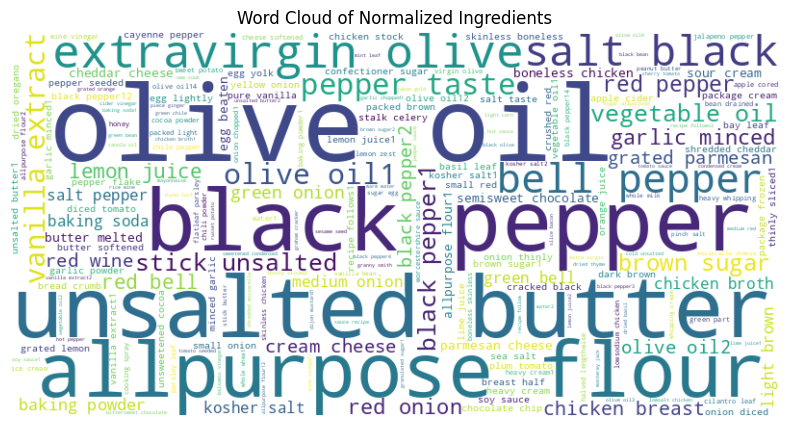

In [31]:
from wordcloud import WordCloud
# Concatenate all the standardized ingredients into a single text
text_data = " ".join(normalized_ingredients)
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Normalized Ingredients')
plt.show()

In [32]:
from collections import Counter
# Calculate word frequencies
word_freq = Counter(" ".join(normalized_ingredients).split())
# Sort word frequencies in descending order
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

**Most Frequent Recipe Ingredients**

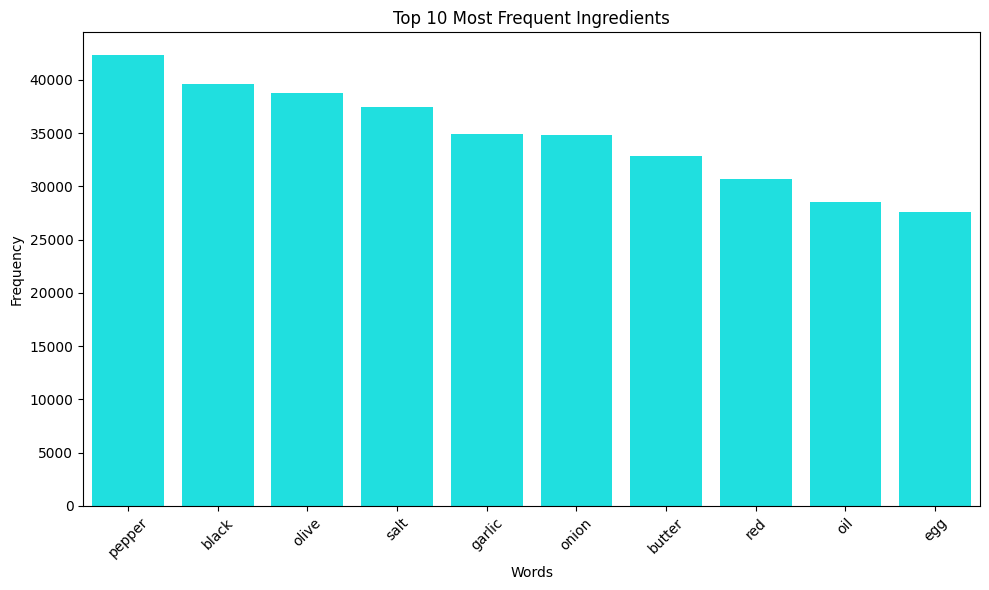

In [33]:
# Top 10 most frequent words
top_n = 10

# Get the top N words and their frequencies
top_words = list(sorted_word_freq.keys())[:top_n]
top_freq = list(sorted_word_freq.values())[:top_n]

plt.figure(figsize=(10,6))
sns.barplot(x=top_words, y=top_freq, color='cyan')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top {} Most Frequent Ingredients'.format(top_n))
plt.tight_layout()
plt.show()

**Recipes with maximum number of ingredients**

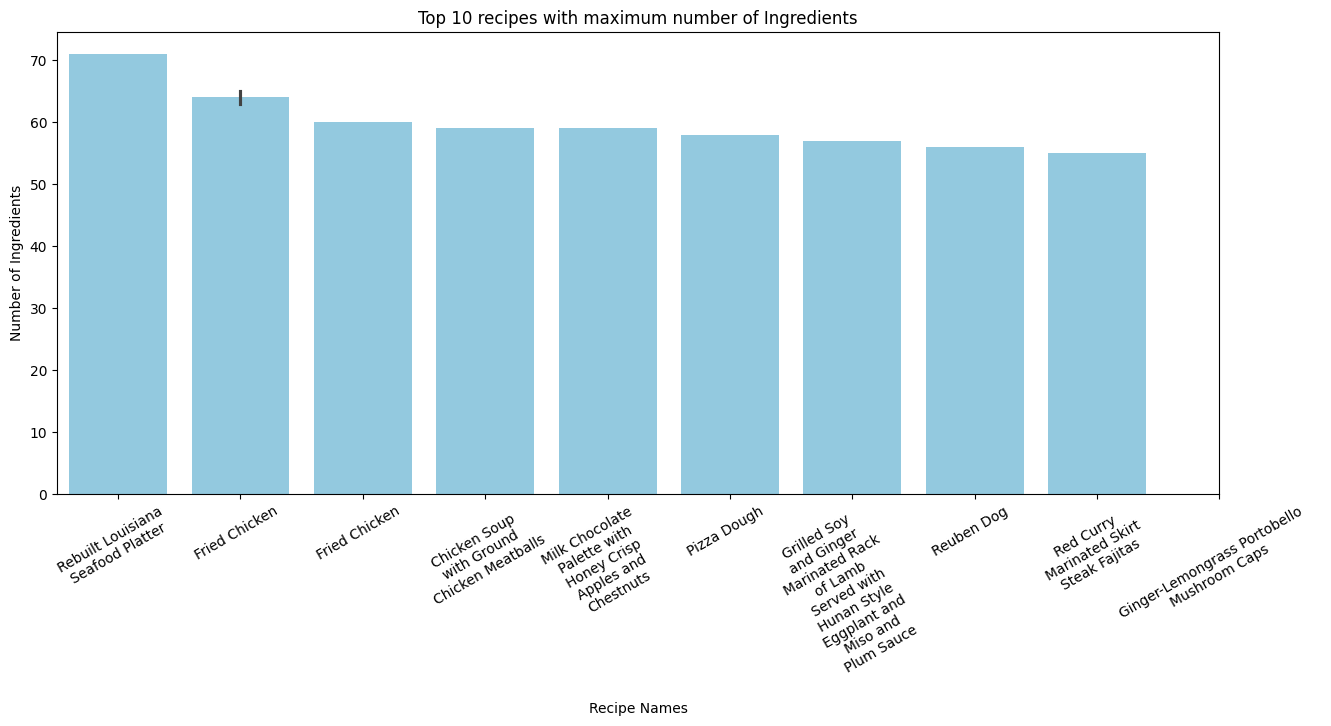

In [34]:
#function to wrap xaxix tick names
#Add new line after three words
def wrap_text(sentence):
    a=sentence.split()
    n=2
    ret= ''
    for i in range(0, len(a), n):
         ret += ' '.join(a[i:i+n]) + '\n'
    return ret
df_plot=recipes_df[['title', 'ingredient_item']].sort_values(by='ingredient_item', ascending=False).head(10)
df_plot['wrapped_text']=df_plot['title'].apply(lambda x: wrap_text(x))
plt.figure(figsize=(15,6))
sns.barplot(data=df_plot,
            x='title', y='ingredient_item', color='skyblue')
plt.xlabel('Recipe Names')
plt.ylabel('Number of Ingredients')
plt.xticks(range(0,len(df_plot.index)), df_plot['wrapped_text'].values, rotation=30)
plt.title('Top 10 recipes with maximum number of Ingredients')
plt.show()

Combining all text in a dataframe and normalizing it.

This approach aims to improve the search functionality by aggregating relevant information from different columns into one consolidated text field. This way, the search algorithm can analyze a broader range of textual data when making recommendations, increasing the likelihood of finding relevant recipes based on user input

In [35]:
combined_text =recipes_df['title']+ ' '+recipes_df['items']+' '+recipes_df['instructions']

In [36]:
normalized_text = normalize_text(combined_text)

In [44]:
#convert the combined text into a Dataframe
combined_df=pd.DataFrame(normalized_text)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123374 entries, 0 to 123373
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       123374 non-null  object
dtypes: object(1)
memory usage: 964.0+ KB


In [45]:
combined_df = combined_df.rename(columns={0: 'combined_text'})

In [46]:
combined_df.head(3)

,combined_text
0,slow cooker chicken dumpling skinless boneless...
1,awesome slow cooker pot roast condensed cream ...
2,brown sugar meatloaf ketchup lean beef small o...


#Recommendation using text similarity

###Implementing TFIDF Vectorization and Cosine Similarity

In [47]:
combined_text= combined_df['combined_text'].tolist()

In [48]:
combined_text[0:50]

['slow cooker chicken dumpling skinless boneless chicken breast half onion diced package refrigerated biscuit dough torn piece condensed cream chicken soup butter place chicken butter soup onion slow cooker fill enough water cover cover cook hour high minute serving place torn biscuit dough slow cooker cook dough longer raw center',
 'awesome slow cooker pot roast condensed cream mushroom soup water pot roast package onion soup mix slow cooker mix cream mushroom soup onion soup mix water place pot roast slow cooker coat soup mixture cook high setting hour low setting hour',
 'brown sugar meatloaf ketchup lean beef small onion packed brown sugar crushed saltine cracker crumb egg salt ginger black pepper milk preheat oven degree f degree c lightly grease 5x9 loaf pan press brown sugar bottom prepared loaf pan spread ketchup sugar mixing bowl mix thoroughly remaining ingredient shape loaf place top ketchup bake preheated oven hour juice clear',
 'best chocolate chip cooky baking soda salt

This approach involves identifying and filtering out tokens that represent specific measurements, quantities, or units, which may not contribute meaningfully to the search or recommendation process. By applying regex matching, you can target and remove these tokens from the text data, ensuring that the remaining tokens are more relevant for search and recommendation purposes.

In [49]:
def custom_tokenizer(text):
    tokens = text.split()
    tokens= [re.sub(r'\d+$', '', token) for token in tokens]
    # Filter out measurement patterns
    tokens= [token for token in tokens if not re.match(r'^\d+[A-Za-z]+\d+$', token)]
    filtered_tokens = [token for token in tokens if not re.match(r'\d+(?:\/\d+)?(?:[a-z°°]+)?', token)]

    return filtered_tokens


from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, lowercase= True, max_features=50000)

# Apply TF-IDF vectorization to the combined text
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)

In [50]:
tfidf_words = tfidf_vectorizer.get_feature_names_out()
print(tfidf_matrix.shape)
print(len(tfidf_words))

(123374, 50000)
50000


In [47]:
# Example user input (replace this with actual user input after preprocessing)
#user_input = "ground beef, pasta, spaghetti, tomato sauce, bacon, onion, zucchini, and, cheese"

In [51]:
user_input = input("Enter your items: ")

Enter your items: milk, sugar, cheese


**Finding recipes using Cosine Similarity**

In [52]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix

# Function to calculate cosine similarity between a user input vector and recipe vectors
def calculate_similarity(user_input_vector, recipe_matrix):
    return cosine_similarity(user_input_vector, recipe_matrix)

def find_recipes(user_input):

    # Generate the user input vector using the TFIDF model
    user_input_vector = tfidf_vectorizer.transform([user_input])

    # Calculate similarity between user input vector and recipe vectors
    similarities = calculate_similarity(user_input_vector, tfidf_matrix )
    return similarities

similarities=find_recipes(user_input)

In [53]:
#resetting index from recipes_df since we dropped some rows while preprocessing
recipes_df = recipes_df.reset_index(drop=True)

In [54]:
# Sort the recipes based on similarity and get top N recommendations
top_n = 5
top_indices = np.argsort(similarities[0])[::-1][:top_n]
top_recipes = [recipes_df['title'][i] for i in top_indices]

print(f"Top {top_n} Recipe Recommendations:")
for i, recipe in enumerate(top_recipes, 1):
    print(f"{i}. {recipe}")

Top 5 Recipe Recommendations:
1. Gluten-Free Macaroni and Three Cheeses with Bacon
2. Four Cheese Sauce
3. Blue Cheese Ball
4. Chili Cheese Dip V
5. Rice Lasagna


In [55]:
recipes_df.loc[top_indices, ['title', 'items', 'instructions']]

,title,items,instructions
23310,Gluten-Free Macaroni and Three Cheeses with Bacon,"8 slices cooked bacon, chopped (optional) ;16 ...",Preheat oven to 350 degrees F (175 degrees C)....
5806,Four Cheese Sauce,1/2 cup shredded mozzarella cheese ;1/2 cup gr...,In a medium saucepan combine whipping cream an...
7789,Blue Cheese Ball,1/4 cup minced onion ;1 cup crumbled blue chee...,"In a medium bowl, stir together the cream chee..."
7243,Chili Cheese Dip V,;1 (15 ounce) can chili ;1 (8 ounce) package c...,"In the bottom of a 9 inch, microwave safe roun..."
13894,Rice Lasagna,"3 cups cooked rice, cooled ;1 (26 ounce) jar s...",Preheat oven to 375 degrees F (190 degrees C)....


###**Recommendation based on Topic Modelling**

In [56]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
pip install pyLDAvis

In [ ]:
#Train LDA model on recipe dataset
corpus = [gensim.utils.simple_preprocess(recipe) for recipe in recipes_df['instructions']]
dictionary = corpora.Dictionary(corpus)
corpus_bow = [dictionary.doc2bow(doc) for doc in corpus]
lda_model = gensim.models.LdaModel(corpus_bow, num_topics=10, id2word=dictionary)

In [64]:
lda_model.show_topics(formatted=False)

[(0,
  [('and', 0.075142756),
   ('the', 0.058726892),
   ('to', 0.046759944),
   ('add', 0.02600985),
   ('in', 0.019653507),
   ('with', 0.017568465),
   ('for', 0.014135129),
   ('until', 0.013431253),
   ('pot', 0.012926295),
   ('potatoes', 0.0121325785)]),
 (1,
  [('and', 0.07721166),
   ('in', 0.04274083),
   ('with', 0.03451357),
   ('bowl', 0.027664067),
   ('the', 0.02573475),
   ('juice', 0.023549227),
   ('ice', 0.01817496),
   ('combine', 0.016908411),
   ('lemon', 0.016180083),
   ('into', 0.014959621)]),
 (2,
  [('and', 0.051098317),
   ('the', 0.035758898),
   ('in', 0.033985753),
   ('until', 0.028643908),
   ('to', 0.028159468),
   ('with', 0.01699046),
   ('bowl', 0.015767412),
   ('sugar', 0.0145928925),
   ('minutes', 0.01429029),
   ('baking', 0.012592074)]),
 (3,
  [('and', 0.09116645),
   ('the', 0.081109226),
   ('to', 0.036882594),
   ('add', 0.033088885),
   ('heat', 0.03079093),
   ('in', 0.026457613),
   ('until', 0.025777318),
   ('minutes', 0.023869548),


In [65]:
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus_bow, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [66]:
#Assign topics to recipes
recipe_topics = [lda_model.get_document_topics(doc) for doc in corpus_bow]

In [67]:
#Process user input
user_input = input("Enter your input: ")
user_input_tokens = gensim.utils.simple_preprocess(user_input)

Enter your input: sugar, cheese, milk


In [68]:
#Match user input with topics
user_input_bow = dictionary.doc2bow(user_input_tokens)
user_topics = lda_model.get_document_topics(user_input_bow)

In [69]:
#Rank recipes based on topic relevance
topic_similarities = [gensim.matutils.cossim(user_topics, recipe_topic) for recipe_topic in recipe_topics]

In [70]:
#Recommend top-ranked recipes
top_indices = sorted(range(len(topic_similarities)), key=lambda i: topic_similarities[i], reverse=True)[:5]
top_recipes = [recipes_df['title'][i] for i in top_indices]

In [71]:
#print("Top 5 Recipe Recommendations:")
for i, recipe in enumerate(top_recipes, 1):
    print(f"{i}. {recipe}")

1. Bacon Cheddar Deviled Eggs
2. Clarified Butter 
3. World's Best Queso Dip
4. Bluewater Bread Pudding with Caramel Sauce 
5. Sugar-Crusted French Toast with Honeyed Apples 


In [72]:
result = recipes_df.loc[top_indices, ['title', 'items', 'instructions']]
result

,title,items,instructions
485,Bacon Cheddar Deviled Eggs,4 slices bacon ;;12 eggs ;1/2 cup mayonnaise ;...,"Place eggs in a saucepan, and cover with cold ..."
59778,Clarified Butter,"2 cups (4 sticks) unsalted butter, each stick ...",Place butter pieces in 4-cup glass measuring c...
26285,World's Best Queso Dip,1 (10 ounce) can RED GOLD® Petite Diced Tomato...,"Microwave Method: In microwave safe bowl, comb..."
57695,Bluewater Bread Pudding with Caramel Sauce,1/2 cup dark rum;1 tablespoon vanilla extract;...,For sauce: Whisk all ingredients in heavy larg...
48833,Sugar-Crusted French Toast with Honeyed Apples,6 large eggs;3 large egg yolks;1 tablespoon va...,For poached apples: Combine first 7 ingredient...


###**<u>Recommendation</u>**

Based on the results obtained from both TF-IDF vectorization with cosine similarity and LDA model, it seems that the LDA model-based recommendation provided recipes that are more directly related to the input ingredients "cheese, bread, noodles" compared to the TF-IDF approach. This indicates that the LDA model might be capturing more nuanced relationships between recipes and ingredients, leading to more relevant recommendations.

###**<u>Improvements</u>**

1. **Evaluation:** Evaluate the quality of recommendations from both approaches using metrics such as relevance, diversity, and user satisfaction. You can gather feedback from users or perform manual inspection to assess the accuracy and usefulness of the recommended recipes.
2. **Refinement of Input**: Experiment with different formats or representations of user input. For example, consider including additional information such as cooking preferences (e.g., vegetarian, gluten-free) or specific dish types (e.g., pasta, sandwich) to refine the recommendations further.
3. **Incorporating Recipe Metadata:** Utilize additional metadata associated with recipes, such as cuisine type, meal type, cooking time, and user ratings, to improve the recommendation process. Incorporating such information can enhance the relevance and variety of recommended recipes.
4. **Hybrid Approaches:** Explore hybrid recommendation approaches that combine multiple algorithms or data sources. For example, you can combine the outputs of TF-IDF-based similarity and LDA-based topic modeling to leverage the strengths of both methods and provide more robust recommendations.
5. **Personalization:** Implement personalization techniques to tailor recommendations to individual user preferences and past interactions. This can involve collaborative filtering, content-based filtering, or hybrid recommendation approaches that take into account user profiles and behavior.
6. **User Interface Enhancement:** Enhance the user interface of the recommendation system to provide a more intuitive and engaging experience. This can include features such as recipe previews, cooking instructions, ingredient substitution suggestions, and social sharing options.
7. **Continuous Improvement:** Continuously monitor and analyze user feedback and system performance to identify areas for improvement. Regularly update the recommendation algorithm and underlying data to adapt to changing user preferences and trends.